# Running Machine Learning Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [4]:
PA_Final = pd.read_csv('/content/drive/MyDrive/PA_Final.csv')

In [5]:
PA_Final.columns

Index(['CountyName', 'LocationName', 'Asthma', 'TotalPopulation',
       'TotalPop18plus', 'COP', 'GEOID', 'Smoking', 'Drinking', 'Short_Sleep',
       'Physical_Activity', 'neighbor_avg_density', 'minority', 'aging',
       'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
       'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',
       'Hdensity_pct', 'lst_winter', 'ndvi_fall', 'evi_spring', 'evi_fall',
       'savi_fall', 'savi_winter', 'savi_summer', 'savi_spring', 'ndvi_winter',
       'lst_summer', 'evi_summer', 'lst_spring', 'lst_fall', 'ndvi_spring',
       'ndvi_summer', 'evi_winter'],
      dtype='object')

The COPD exacerbation rate was higher in winter (0.13 exacerbations/person-month) than in spring, summer, and fall (0.11, 0.079, and 0.10 exacerbations/person-month, respectively) (P < 0.001). Summer had the highest proportion of severe exacerbations (40.5%) compared with spring, fall, and winter (32.6%, 34.7%, and 33.1%, respectively) (P = 0.004).

In [6]:
def calculate_seasonal_exacerbations_df(df, total_column, seasonal_rates):
    """
    Apply the seasonal exacerbation calculation to a DataFrame column containing total exacerbations.

    :param df: The DataFrame containing the total exacerbations column
    :param total_column: The name of the column containing total exacerbations for each tract
    :param seasonal_rates: Dictionary with seasonal rates for each season (winter, spring, summer, fall)

    :return: The DataFrame with new columns for seasonal exacerbations
    """
    # Normalize the seasonal rates
    total_rate = sum(seasonal_rates.values())
    normalized_rates = {season: rate / total_rate for season, rate in seasonal_rates.items()}

    # Calculate seasonal exacerbations for each row in the DataFrame
    for season, rate in normalized_rates.items():
        df[f'{season}_count'] = df[total_column] * rate
        df[f'{season}_rate'] = df[f'{season}_count'] / df['TotalPopulation'] * 100

    return df

In [7]:
seasonal_rates = {
    'winter': 0.39,  # Winter rate
    'spring': 0.33,  # Spring rate
    'summer': 0.237, # Summer rate
    'fall': 0.30     # Fall rate
}

PA_Final["COP_People"] = PA_Final["COP"] / 100 * PA_Final["TotalPopulation"]
PA_Final = calculate_seasonal_exacerbations_df(PA_Final, 'COP_People', seasonal_rates)

In [8]:
PA_Final.columns

Index(['CountyName', 'LocationName', 'Asthma', 'TotalPopulation',
       'TotalPop18plus', 'COP', 'GEOID', 'Smoking', 'Drinking', 'Short_Sleep',
       'Physical_Activity', 'neighbor_avg_density', 'minority', 'aging',
       'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
       'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',
       'Hdensity_pct', 'lst_winter', 'ndvi_fall', 'evi_spring', 'evi_fall',
       'savi_fall', 'savi_winter', 'savi_summer', 'savi_spring', 'ndvi_winter',
       'lst_summer', 'evi_summer', 'lst_spring', 'lst_fall', 'ndvi_spring',
       'ndvi_summer', 'evi_winter', 'COP_People', 'winter_count',
       'winter_rate', 'spring_count', 'spring_rate', 'summer_count',
       'summer_rate', 'fall_count', 'fall_rate'],
      dtype='object')

In [10]:
# spring dataframe
PA_Spring = PA_Final[['CountyName', 'Asthma', 'TotalPopulation', 'COP', 'GEOID', 'Smoking',
                      'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                      'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                      'evi_spring','lst_spring', 'ndvi_spring', 'savi_spring', 'spring_count', "spring_rate"]]

In [11]:
# summer dataframe
PA_Summer = PA_Final[['CountyName', 'Asthma', 'TotalPopulation', 'COP', 'GEOID', 'Smoking',
                      'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                      'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                      'evi_summer','lst_summer', 'ndvi_summer', 'savi_summer', 'summer_count', "summer_rate"]]

In [12]:
# fall dataframe
PA_Fall = PA_Final[['CountyName', 'Asthma', 'TotalPopulation', 'COP', 'GEOID', 'Smoking',
                      'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                      'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                      'evi_fall','lst_fall', 'ndvi_fall', 'savi_fall', 'fall_count', "fall_rate"]]

In [13]:
# winter dataframe
PA_Winter = PA_Final[['CountyName', 'Asthma', 'TotalPopulation', 'COP', 'GEOID', 'Smoking',
                      'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                      'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                      'evi_winter','lst_winter', 'ndvi_winter', 'savi_winter', 'winter_count', "winter_rate"]]

# Exploratory Analysis

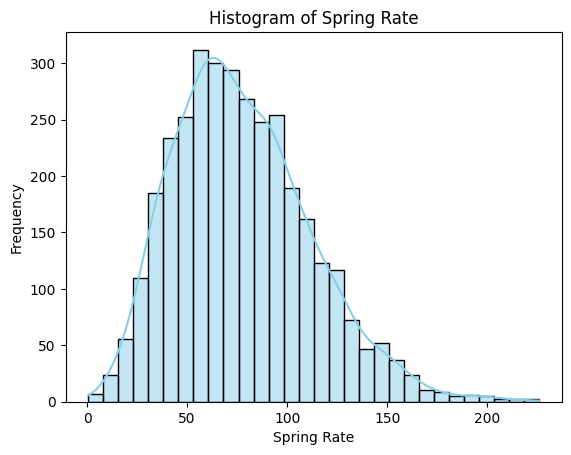

In [25]:
sns.histplot(PA_Spring['spring_count'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Spring Rate')
plt.xlabel('Spring Rate')
plt.ylabel('Frequency')
plt.show()


# Dimensionality Reduction

In [14]:
# attempt to reduce dimensionality
feature_columns  = ['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                    'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_spring','lst_spring', 'ndvi_spring', 'savi_spring']
target_column = "spring_rate"

X = PA_Spring[feature_columns]
y = PA_Spring[target_column]

In [28]:
def calculate_bic(y_true, y_pred, n, p):
    """Calculate Bayesian Information Criterion (BIC)."""
    mse = mean_squared_error(y_true, y_pred)
    return n * np.log(mse) + p * np.log(n)

# Step 1: Fit the full model
full_model = LinearRegression().fit(X, y)
y_pred_full = full_model.predict(X)
n_samples = len(y)
p_predictors = X.shape[1]
bic_full = calculate_bic(y, y_pred_full, n_samples, p_predictors)

# Step 2: Perform backward elimination
selected_predictors = list(X.columns)
selected_bic = bic_full

while True:
    best_bic = selected_bic
    best_predictors = selected_predictors

    for predictor in selected_predictors:
        predictors_subset = selected_predictors.copy()
        predictors_subset.remove(predictor)
        X_subset = X[predictors_subset]
        model = LinearRegression().fit(X_subset, y)
        y_pred_subset = model.predict(X_subset)
        bic = calculate_bic(y, y_pred_subset, n_samples, len(predictors_subset))
        if bic < best_bic:
            best_bic = bic
            best_predictors = predictors_subset

    if best_bic < selected_bic:
        selected_bic = best_bic
        selected_predictors = best_predictors
    else:
        break

# Print the selected predictors and their BIC
print("Selected predictors:", selected_predictors)
print("BIC:", selected_bic)

Selected predictors: ['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'minority', 'aging', 'disability', 'forest_total', 'Ldensity_total', 'grasses_total', 'forest_pct', 'lst_spring']
BIC: -12292.878498899865


# Comparing Across Variables

In [16]:
def split_and_scale_data(X, y, stratify_col, test_size=0.2, random_state=42):
    """
    Splits the data into train and test sets, and applies scaling.

    Parameters:
        X (DataFrame): Feature matrix.
        y (Series): Target variable.
        stratify_col (Series): Column to stratify by.
        test_size (float): Proportion of data to include in the test split.
        random_state (int): Seed for reproducibility.

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test (arrays): Scaled feature splits and target splits.
        scaler (StandardScaler): Fitted scaler for future use.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=stratify_col
    )

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler


In [17]:
def train_and_evaluate_rf(X_train, X_test, y_train, y_test, feature_names, n_estimators=100, random_state=42):
    """
    Trains a Random Forest Regressor and evaluates its performance.

    Parameters:
        X_train, X_test, y_train, y_test (arrays): Train-test split data.
        feature_names (list): List of feature names for feature importance.
        n_estimators (int): Number of trees in the forest.
        random_state (int): Seed for reproducibility.

    Returns:
        results (dict): Dictionary containing predictions, metrics, and feature importances.
    """
    # Train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions
    predictions_rf = rf_model.predict(X_test)

    # Calculate metrics
    mse_rf = mean_squared_error(y_test, predictions_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_test, predictions_rf)
    mae_rf = mean_absolute_error(y_test, predictions_rf)

    # Compute feature importances
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    return {
        'predictions': predictions_rf,
        'rmse': rmse_rf,
        'r2': r2_rf,
        'importance_df': importance_df
    }


In [29]:
def extract_results(results, method_name):
    """
    Extract r2, rmse, and top 5 feature importances from the result of a Random Forest model.

    Parameters:
        results (dict): Result from the train_and_evaluate_rf function.
        method_name (str): Identifier for the method used (e.g., "sp_all", "sp_bic", etc.).

    Returns:
        metrics (list): List containing RMSE and R².
        top_features (list): List of top 5 features.
    """
    # Extract metrics
    metrics = [results['rmse'], results['r2']]

    # Extract top 5 features
    top_features = results['importance_df']['Feature'].head(5).tolist()
    return metrics, top_features

## Spring Model

In [66]:
# using all variables
stratify_col = PA_Spring['CountyName']
X_Spring_All = PA_Spring[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                    'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_spring','lst_spring', 'ndvi_spring', 'savi_spring']]
y_Spring = PA_Spring[['spring_count']]
X_train_scaled, X_test_scaled, y_train, y_test_sp, scaler = split_and_scale_data(X_Spring_All, y_Spring, stratify_col)
spring_result = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_sp, X_Spring_All.columns)

In [67]:
# using all variables after dimensionality reduction
X_Spring_BIC = PA_Spring[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'minority', 'aging', 'disability', 'forest_total', 'Ldensity_total', 'grasses_total', 'forest_pct', 'lst_spring']]
X_train_scaled, X_test_scaled, y_train, y_test_sp, scaler = split_and_scale_data(X_Spring_BIC, y_Spring, stratify_col)
spring_result_BIC = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_sp, X_Spring_BIC.columns)

In [70]:
# using all environmental predictors
X_Spring_Env = PA_Spring[['forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_spring','lst_spring', 'ndvi_spring', 'savi_spring']]
X_train_scaled, X_test_scaled, y_train, y_test_sp, scaler = split_and_scale_data(X_Spring_Env, y_Spring, stratify_col)
spring_result_env = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_sp, X_Spring_Env.columns)

In [21]:
# using all socio-behavioral predictors
X_Spring_Sol = PA_Spring[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability']]
X_train_scaled, X_test_scaled, y_train, y_test_sp, scaler = split_and_scale_data(X_Spring_Sol, y_Spring, stratify_col)
spring_result_sol = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_sp, X_Spring_Sol.columns)

## Summer Model

In [71]:
# using all variables
stratify_col = PA_Summer['CountyName']
X_Summer_All = PA_Summer[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                    'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_summer','lst_summer', 'ndvi_summer', 'savi_summer']]
y_Summer = PA_Summer[['summer_count']]
X_train_scaled, X_test_scaled, y_train, y_test_su, scaler = split_and_scale_data(X_Summer_All, y_Summer, stratify_col)
summer_result = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_su, X_Summer_All.columns)

In [72]:
# using all variables after dimensionality reduction
X_Summer_BIC = PA_Summer[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'minority', 'aging', 'disability', 'forest_total', 'Ldensity_total', 'grasses_total', 'forest_pct', 'lst_summer']]
X_train_scaled, X_test_scaled, y_train, y_test_su, scaler = split_and_scale_data(X_Summer_BIC, y_Summer, stratify_col)
summer_result_BIC = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_su, X_Summer_BIC.columns)

In [73]:
# using only environment variables
X_Summer_Env = PA_Summer[['forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_summer','lst_summer', 'ndvi_summer', 'savi_summer']]
X_train_scaled, X_test_scaled, y_train, y_test_su, scaler = split_and_scale_data(X_Summer_Env, y_Summer, stratify_col)
summer_result_env = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_su, X_Summer_Env.columns)

In [74]:
# using only social behavorial variables
X_Summer_Sol = PA_Summer[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability']]
X_train_scaled, X_test_scaled, y_train, y_test_su, scaler = split_and_scale_data(X_Summer_Sol, y_Summer, stratify_col)
summer_result_sol = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_su, X_Summer_Sol.columns)

# Fall Model

In [75]:
# using all variables
stratify_col = PA_Fall['CountyName']
X_Fall_All = PA_Fall[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                    'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_fall','lst_fall', 'ndvi_fall', 'savi_fall']]
y_Fall = PA_Fall[['fall_count']]
X_train_scaled, X_test_scaled, y_train, y_test_fa, scaler = split_and_scale_data(X_Fall_All, y_Fall, stratify_col)
fall_result = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_fa, X_Fall_All.columns)

In [77]:
# using all variables after dimensionality reduction
X_Fall_BIC = PA_Fall[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'minority', 'aging', 'disability', 'forest_total', 'Ldensity_total', 'grasses_total', 'forest_pct', 'lst_fall']]
X_train_scaled, X_test_scaled, y_train, y_test_fa, scaler = split_and_scale_data(X_Fall_BIC, y_Fall, stratify_col)
fall_result_BIC = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_fa, X_Fall_BIC.columns)

In [76]:
# using only environment variables
X_Fall_Env = PA_Fall[['forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_fall','lst_fall', 'ndvi_fall', 'savi_fall']]
X_train_scaled, X_test_scaled, y_train, y_test_fa, scaler = split_and_scale_data(X_Fall_Env, y_Fall, stratify_col)
fall_result_env = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_fa, X_Fall_Env.columns)

In [78]:
# using only social behavorial variables
X_Fall_Sol = PA_Fall[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability']]
X_train_scaled, X_test_scaled, y_train, y_test_fa, scaler = split_and_scale_data(X_Fall_Sol, y_Fall, stratify_col)
fall_result_sol = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_fa, X_Fall_Sol.columns)

## Winter Model

In [79]:
# using all variables
stratify_col = PA_Winter['CountyName']
X_Winter_All = PA_Winter[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                    'minority', 'aging', 'disability', 'forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_winter','lst_winter', 'ndvi_winter', 'savi_winter']]
y_Winter = PA_Winter[['winter_count']]
X_train_scaled, X_test_scaled, y_train, y_test_wi, scaler = split_and_scale_data(X_Winter_All, y_Winter, stratify_col)
winter_result = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_wi, X_Winter_All.columns)

In [80]:
# using all variables after dimensionality reduction
X_Winter_BIC = PA_Winter[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'minority', 'aging', 'disability', 'forest_total', 'Ldensity_total', 'grasses_total', 'forest_pct', 'lst_winter']]
X_train_scaled, X_test_scaled, y_train, y_test_wi, scaler = split_and_scale_data(X_Winter_BIC, y_Winter, stratify_col)
winter_result_BIC = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_wi, X_Winter_BIC.columns)

In [81]:
# using only environment variables
X_Winter_Env = PA_Winter[['forest_total', 'wetland_total', 'Hdensity_total',
                    'Ldensity_total', 'grasses_total', 'water_total', 'forest_pct',  'Hdensity_pct',
                    'evi_winter','lst_winter', 'ndvi_winter', 'savi_winter']]
X_train_scaled, X_test_scaled, y_train, y_test_wi, scaler = split_and_scale_data(X_Winter_Env, y_Winter, stratify_col)
winter_result_env = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_wi, X_Winter_Env.columns)

In [82]:
# using only social behavorial variables
X_Winter_Sol = PA_Winter[['Smoking', 'Drinking', 'Short_Sleep', 'Physical_Activity', 'neighbor_avg_density',
                      'minority', 'aging', 'disability']]
X_train_scaled, X_test_scaled, y_train, y_test_wi, scaler = split_and_scale_data(X_Winter_Sol, y_Winter, stratify_col)
winter_result_sol = train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test_wi, X_Winter_Sol.columns)

In [83]:
methods = ['sp_all', 'sp_bic', 'sp_env', 'sp_sol',
           'su_all', 'su_bic', 'su_env', 'su_sol',
           'fa_all', 'fa_bic', 'fa_env', 'fa_sol',
           'wi_all', 'wi_bic', 'wi_env', 'wi_sol']
results = [spring_result, spring_result_BIC, spring_result_env, spring_result_sol,
           summer_result, summer_result_BIC, summer_result_env, summer_result_sol,
           fall_result, fall_result_BIC, fall_result_env, fall_result_sol,
           winter_result, winter_result_BIC, winter_result_env, winter_result_sol
           ]

metrics_data = {}
top_features_data = {}

for method, result in zip(methods, results):
    metrics, top_features = extract_results(result, method)
    metrics_data[method] = metrics
    top_features_data[method] = top_features

compare_metrics = pd.DataFrame(metrics_data, index=['RMSE', 'R2'])
comapre_top_features = pd.DataFrame(top_features_data, index=[f'Feature {i+1}' for i in range(5)])


In [84]:
compare_metrics

,sp_all,sp_bic,sp_env,sp_sol,su_all,su_bic,su_env,su_sol,fa_all,fa_bic,fa_env,fa_sol,wi_all,wi_bic,wi_env,wi_sol
RMSE,22.215634,23.125607,25.363977,28.684670,16.041516,17.048896,18.873498,20.608387,20.240806,21.529757,23.914098,26.085645,26.510291,28.301329,31.487773,33.886914
R2,0.561915,0.525291,0.428948,0.269634,0.557143,0.499776,0.386977,0.269096,0.559970,0.502143,0.385765,0.269148,0.553349,0.490958,0.369879,0.270200


In [64]:
comapre_top_features

,sp_all,sp_bic,sp_env,sp_sol,su_all,su_bic,su_env,su_sol,fa_all,fa_bic,fa_env,fa_sol,wi_all,wi_bic,wi_env,wi_sol
Feature 1,Hdensity_total,Ldensity_total,Hdensity_total,Physical_Activity,Hdensity_total,Ldensity_total,Hdensity_total,Physical_Activity,Hdensity_total,Ldensity_total,Hdensity_total,Physical_Activity,Hdensity_total,Ldensity_total,Hdensity_total,Physical_Activity
Feature 2,Ldensity_total,Physical_Activity,Ldensity_total,neighbor_avg_density,Ldensity_total,Physical_Activity,Ldensity_total,neighbor_avg_density,Ldensity_total,Physical_Activity,Ldensity_total,neighbor_avg_density,Ldensity_total,Physical_Activity,Ldensity_total,neighbor_avg_density
Feature 3,Physical_Activity,lst_spring,lst_spring,disability,Physical_Activity,lst_summer,ndvi_summer,disability,Physical_Activity,lst_fall,Hdensity_pct,disability,Physical_Activity,forest_total,Hdensity_pct,disability
Feature 4,neighbor_avg_density,forest_total,Hdensity_pct,aging,neighbor_avg_density,Smoking,lst_summer,aging,neighbor_avg_density,Smoking,lst_fall,aging,neighbor_avg_density,Smoking,lst_winter,aging
Feature 5,Smoking,Smoking,ndvi_spring,Smoking,Smoking,minority,Hdensity_pct,Smoking,Smoking,forest_total,ndvi_fall,Smoking,Smoking,minority,ndvi_winter,Smoking


In [65]:
compare_metrics.to_csv('/content/drive/MyDrive/compare_metrics.csv')
comapre_top_features.to_csv('/content/drive/MyDrive/comapre_top_features.csv')

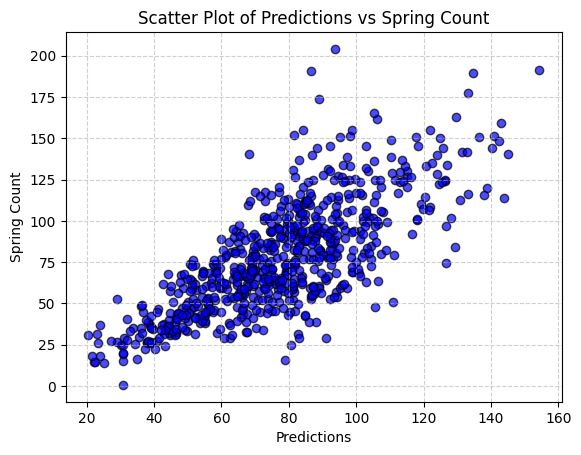

In [89]:
# Create a scatter plot
plt.scatter(spring_result['predictions'], y_test_sp, alpha=0.7, color='blue', edgecolor='black')
plt.title('Scatter Plot of Predictions vs Spring Count')
plt.xlabel('Predictions')
plt.ylabel('Spring Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Comparing Across Different Models

In [ ]:
# svm
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
predictions_svm = svm_model.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, predictions_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, predictions_svm)
print("RMSE for SVM Spring:", rmse_svm)
print("R-squared for SVM Spring:", r2_svm)

In [ ]:
# deep learning multiple layer perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
predictions_mlp = model.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, predictions_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, predictions_mlp)
print("R-squared for MLP Spring:", r2_mlp)
print("RMSE for MLP Spring:", rmse_mlp)